In [31]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [67]:
df = pd.read_csv("C:\\Users\\Sasha\\Desktop\\Py\\Git\\PracticeModels\\DataAnalysis\\repl1.csv")

In [68]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [69]:
#df['overweight'] = df['weight'] / ((df['height']/100) **2) 
df['overweight'] = [1 if x >25 else 0 for x in df['weight'] / ((df['height']/100) **2)]

In [70]:
df['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

In [73]:
df['cholesterol'] = [1 if x >1 else 0 for x in df['cholesterol']]
df['gluc'] = [1 if x >1 else 0 for x in df['gluc']]

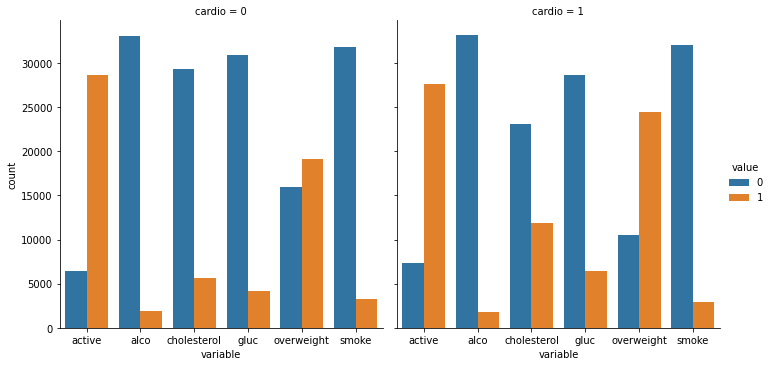

In [74]:
df_cat = pd.melt(df, value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"], id_vars="cardio")

g = sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")

In [34]:
import seaborn as sns

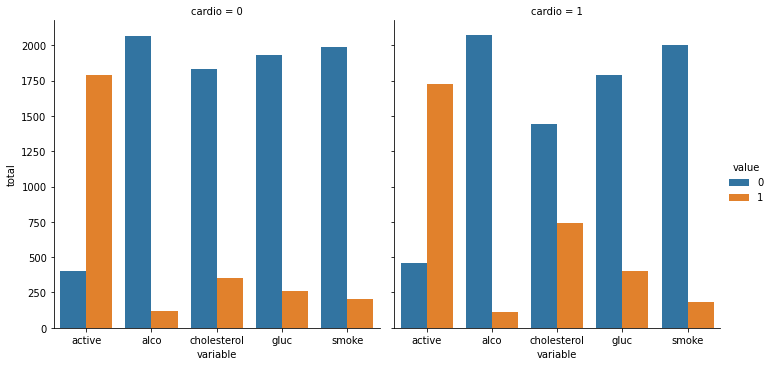

In [35]:
medical_dict = { 1: 0, 2 : 1, 3: 1}
df['cholesterol'] = df['cholesterol'].map( medical_dict )

df['gluc'] = df['gluc'].map( medical_dict ) 

df_cat = df.groupby(["active", "alco", "cholesterol", "gluc", "smoke", 'cardio']).size().rename("total").reset_index().melt(['total', 'cardio'])

sns.catplot(data = df_cat, x='variable', y='total', hue='value', col='cardio', kind="bar", ci = None)